<a href="https://colab.research.google.com/github/jeanmichael1993/Desafio_1_bootCampAnalistaDados/blob/master/Desafio_1_BootCamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto Ambiental

O **metano** é responsável por cerca de **30% do aumento das temperaturas globais** desde a Revolução Industrial, e reduções rápidas e sustentadas nas emissões de metano são essenciais para limitar o aquecimento global a curto prazo e melhorar a qualidade do ar.
<br>
O setor de energia – incluindo petróleo, gás natural, carvão e bioenergia – é responsável por quase 40% das emissões de metano da atividade humana.

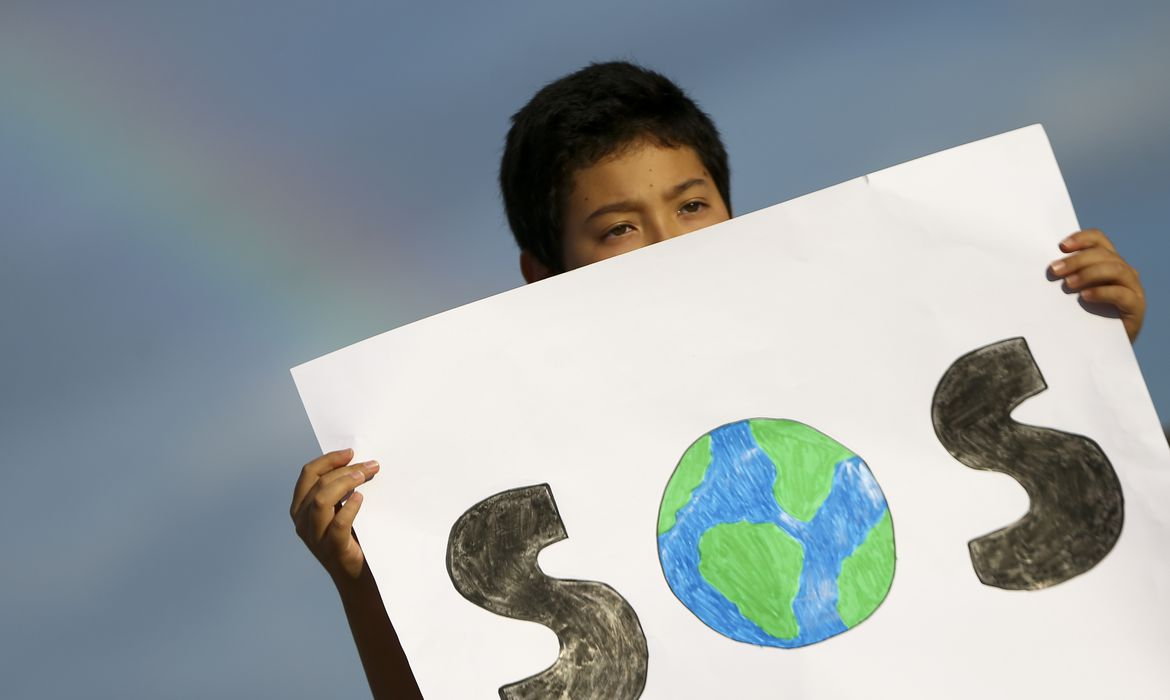

Descrição dos dados:
1. **region** - Continente
2. **country** - País de emissão.
3. **emissions** - Emissões de metano em kt.
4. **type** - Setor de onde ocorrem as emissões.
5. **Segment** - Subsetor de onde ocorrem as emissões.
6. **reason** - O motivo da emissão.
7. **baseYear** - Ano base para o rastreamento das emissões.
8. **notes** - A fonte de dados

**Obersavação**: emissões de metano em kt" referem-se à quantidade de metano que é emitida para a atmosfera, medida em quilotoneladas (kt). O metano é um gás de efeito estufa que contribui para o aquecimento global. A quantidade de metano emitida pode ser medida em diversas unidades, incluindo kt, toneladas métricas ou gigagramas (Gg).


## **Desafio**
<br>
_____
<br>
Criei um relatório com no mínimo com essas informações: <br>
1. Quem são os países maiores ofensores na emissão de metano? <br>
2. Quais regiões do Globo produzem mais emissões de metano? <br>
3. Quais o motivo da emissão de metano? <br>

##Imports e Exploração de dados

In [112]:
import pandas as pd
import seaborn as sns
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
base_dados = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/arquivos/Methane_final.csv')

In [114]:
base_dados.head()

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available


In [115]:
base_dados.shape

(1548, 9)

In [116]:
base_dados.describe( include = 'all')

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
count,1548.000000,1548,1548,1548.000000,1548,1548,1548,1548,1548
unique,NaN,9,105,NaN,4,12,4,2,3
top,NaN,Africa,World,NaN,Energy,Total,All,2022,Not available
freq,NaN,406,22,NaN,1233,414,746,1233,877
mean,773.500000,NaN,NaN,643.255972,NaN,NaN,NaN,NaN,NaN
std,447.013423,NaN,NaN,5566.238201,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,0.000459,NaN,NaN,NaN,NaN,NaN
25%,386.750000,NaN,NaN,2.659361,NaN,NaN,NaN,NaN,NaN
50%,773.500000,NaN,NaN,24.064669,NaN,NaN,NaN,NaN,NaN
75%,1160.250000,NaN,NaN,128.419594,NaN,NaN,NaN,NaN,NaN


In [117]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1548 non-null   int64  
 1   region      1548 non-null   object 
 2   country     1548 non-null   object 
 3   emissions   1548 non-null   float64
 4   type        1548 non-null   object 
 5   segment     1548 non-null   object 
 6   reason      1548 non-null   object 
 7   baseYear    1548 non-null   object 
 8   notes       1548 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 109.0+ KB


In [118]:
base_dados.isnull().sum()

Unnamed: 0    0
region        0
country       0
emissions     0
type          0
segment       0
reason        0
baseYear      0
notes         0
dtype: int64

In [119]:
base_dados.drop(columns=['Unnamed: 0'], inplace=True)

In [120]:
base_dados.head()

,region,country,emissions,type,segment,reason,baseYear,notes
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available


In [121]:
base_dados.nunique()

region          9
country       105
emissions    1531
type            4
segment        12
reason          4
baseYear        2
notes           3
dtype: int64

#Análise Explorátoria

##Quantidade de itens por colunas

In [122]:
base_dados['region'].value_counts()

region
Africa                       406
Europe                       302
Asia Pacific                 270
Middle East                  187
Central and South America    183
Russia & Caspian              96
North America                 61
World                         22
Other                         21
Name: count, dtype: int64

In [123]:
base_dados['country'].value_counts()

country
World                       22
Iran                        22
European Union              22
Russia                      22
Kazakhstan                  22
                            ..
Central African Republic     3
Liberia                      3
Sierra Leone                 3
Seychelles                   3
Gambia                       3
Name: count, Length: 105, dtype: int64

In [124]:
base_dados['emissions'].value_counts()

emissions
0.004000        5
0.132000        3
0.020000        2
29.507999       2
0.028000        2
               ..
10.448000       1
271.931000      1
20.071501       1
49.858101       1
70758.710938    1
Name: count, Length: 1531, dtype: int64

In [125]:
base_dados['type'].value_counts()

type
Energy         1233
Agriculture     105
Other           105
Waste           105
Name: count, dtype: int64

In [126]:
base_dados['segment'].value_counts()

segment
Total                                             414
Onshore oil                                       217
Gas pipelines and LNG facilities                  164
Offshore oil                                      159
Onshore gas                                       144
Offshore gas                                      118
Other from oil and gas                             98
Bioenergy                                          93
Other from coal                                    66
Steam coal                                         30
Coking coal                                        24
Satellite-detected large oil and gas emissions     21
Name: count, dtype: int64

In [127]:
base_dados['reason'].value_counts()

reason
All         746
Fugitive    342
Vented      342
Flared      118
Name: count, dtype: int64

In [128]:
base_dados['baseYear'].value_counts()

baseYear
2022         1233
2019-2021     315
Name: count, dtype: int64

##Análises Gráficas

##Metáno

Text(0, 0.5, 'Frequency')

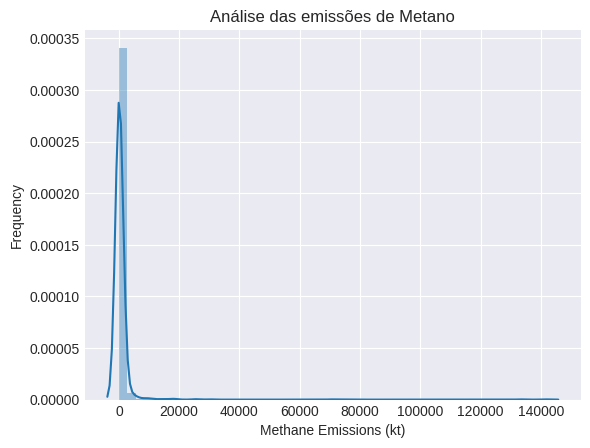

In [129]:
sns.distplot(base_dados['emissions'])

plt.title('Análise das emissões de Metano')
plt.xlabel('Methane Emissions (kt)')
plt.ylabel('Frequency')

In [130]:
total_emission = base_dados['emissions'].sum()
print(f'O total em toneladas métrica são:  {round(total_emission)}.')

O total em toneladas métrica são:  995760.


##Quem são os países maiores ofensores na emissão de metano?

In [131]:
top_10_paises = base_dados.groupby(by=['country'])['emissions'].sum().sort_values(ascending=False).head(10)

In [132]:
top_10_paises_f = top_10_paises

In [133]:
top_10_paises = top_10_paises.reset_index()

In [134]:
top_10_paises = top_10_paises.drop([0])

In [135]:
top_10_paises

,country,emissions
1,China,81048.371586
2,United States,48604.877296
3,Russia,42432.929804
4,India,34852.007386
5,Brazil,21720.838126
6,Indonesia,19404.469000
7,European Union,18985.173461
8,Other,15997.357175
9,Iran,13030.685366


In [136]:
import altair as alt

hist = alt.Chart(top_10_paises).mark_bar().encode(
    alt.X('emissions:Q', title='Emissions (kt)'),
    alt.Y('country:N', title='Country', sort=alt.EncodingSortField(field='emissions', order='descending')),
    color='country',
).properties(
    width=800,
    height=400
)
hist

alt.Chart(...)

In [137]:
base_dados_sem_world = base_dados[base_dados['region'] != 'World']

In [138]:
import plotly.express as px

px.box(base_dados_sem_world, x='emissions', y='region')

In [148]:


hist2 = alt.Chart(base_dados_sem_world).mark_bar().encode(
    alt.X('emissions:Q', title='Emissions (kt)'),
    alt.Y('region:N', title='region', sort=alt.EncodingSortField(field='emissions', order='descending')),
    color='region',
).properties(
    width=800,
    height=400
)
hist2

alt.Chart(...)

In [139]:

import altair as alt
import pandas as pd

alt_pie = alt.Chart(base_dados_sem_world).mark_arc().encode(
    theta='count()',
    color='type:N',
    tooltip = ['type','count()'],
).properties(
    width=300,
    height=300
)

alt_pie

alt.Chart(...)

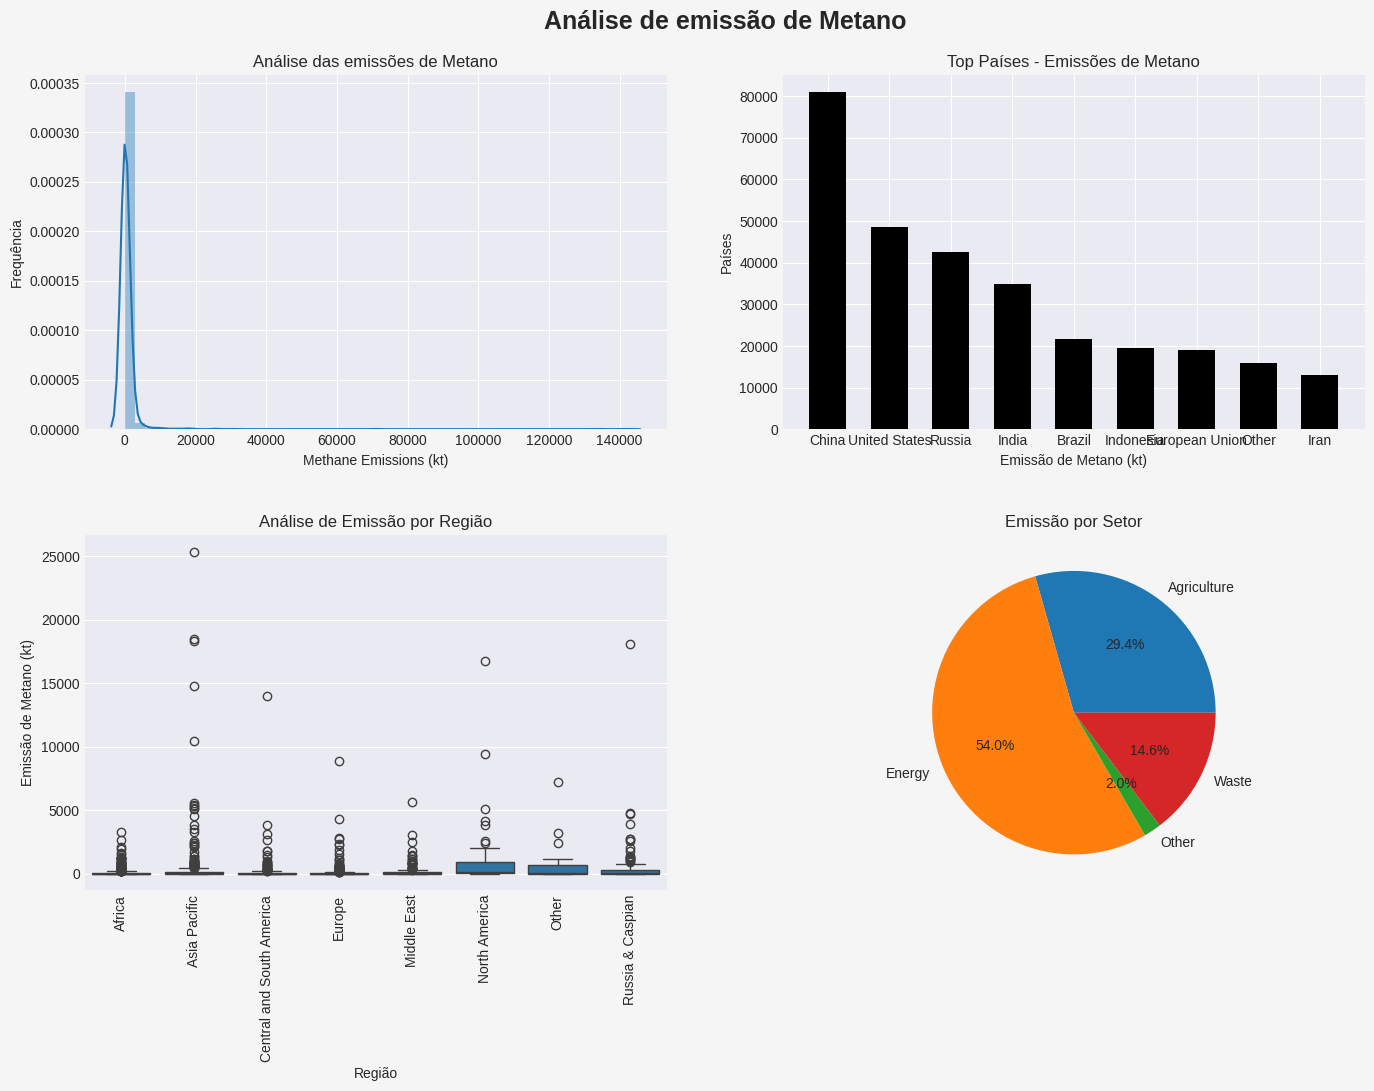

In [141]:
# Grid de gráficos
Quantidade_Graficos = 2
Colunas = 2
Loop_Repeticao = 1

# Ajuste do relatorio
Figura = plt.figure( figsize=(16, 10) )
Cor_Fundo = "#f5f5f5"
Figura.set_facecolor( Cor_Fundo )

# Estilo
plt.style.use('seaborn-darkgrid')

# Titulo principal
plt.suptitle(f'Análise de emissão de Metano', fontsize=18, fontweight=600 )

### 1º Linha

# 1º Gráfico
plt.subplot( Quantidade_Graficos, Colunas, 1 )
sns.distplot( base_dados['emissions'] )
plt.title('Análise das emissões de Metano')
plt.xlabel('Methane Emissions (kt)')
plt.ylabel('Frequência')

# 2º Gráfico
plt.subplot( Quantidade_Graficos, Colunas, 2 )
plt.bar( top_10_paises_f.index[1:], top_10_paises_f.values[1:], width=0.6, color="black" )
plt.title('Top Países - Emissões de Metano')
plt.xlabel('Emissão de Metano (kt)')
plt.ylabel('Países')

### 2º Linha

# 3º Gráfico
plt.subplot( Quantidade_Graficos, Colunas, 3 )
sns.boxplot( data=base_dados.loc[ base_dados['region'] != 'World' ], x='region', y='emissions' )
plt.xticks(rotation=90)
plt.xlabel('Região')
plt.ylabel('Emissão de Metano (kt)')
plt.title('Análise de Emissão por Região');

# 3º Linha
plt.subplot( Quantidade_Graficos, Colunas, 4 )
base_dados.groupby('type')['emissions'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Emissão por Setor')

# Layout
plt.subplots_adjust( left=0.1, bottom=0.1, right=0.9, top=0.915, wspace=0.2, hspace=0.3 );

1. Quem são os países maiores ofensores na emissão de metano?
* R: China, USA, Russia e India
2. Quais regiões do Globo produzem mais emissões de metano?
* R: Asia Pacific, Russia e Noth America
3. Quais o motivo da emissão de metano?
* Energy, Agriculture e Waste.